## Experimento

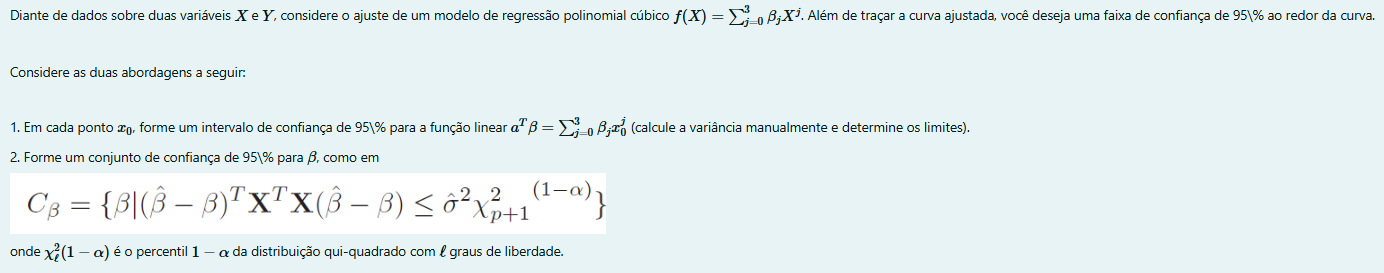

In [ ]:
%pip install matplotlib

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from numpy.linalg import inv

### Simulando dados

In [10]:
np.random.seed(42)
n = 30
X = np.linspace(-3, 3, n)
A = np.vstack([np.ones_like(X), X, X**2, X**3]).T
true_beta = np.array([1.0, -2.0, 0.5, 0.1])
y = A @ true_beta + np.random.normal(0, 2, size=n)

### Estimando os coeficientes beta

In [11]:
beta_hat = inv(A.T @ A) @ (A.T @ y)
residuals = y - A @ beta_hat
p = A.shape[1]
sigma_sq = (residuals @ residuals) / (n - p)
cov_beta = sigma_sq * inv(A.T @ A)

### Abordagens

In [26]:
from scipy.stats import norm

confianca = 0.95
alpha = 1 - confianca

z = round(norm.ppf(1 - alpha/2), 2)
z

1.96

In [ ]:
# 1: Intervalo de confiança pontual para f(x)
x0_vals = np.linspace(-3, 3, 100)
A0 = np.vstack([np.ones_like(x0_vals), x0_vals, x0_vals**2, x0_vals**3]).T
y_hat = A0 @ beta_hat
conf_band_1 = np.array([np.sqrt(sigma_sq * a0.T @ inv(A.T @ A) @ a0) for a0 in A0])
ci_1_lower = y_hat - z * conf_band_1
ci_1_upper = y_hat + z * conf_band_1

# 2: Conjunto de confiança para beta
chi2_crit = chi2.ppf(confianca, df=p)
conf_band_2 = np.array([np.sqrt(chi2_crit * a0.T @ cov_beta @ a0) for a0 in A0])
ci_2_lower = y_hat - conf_band_2
ci_2_upper = y_hat + conf_band_2

### Comparação entre Abordagens de Intervalo de Confiança

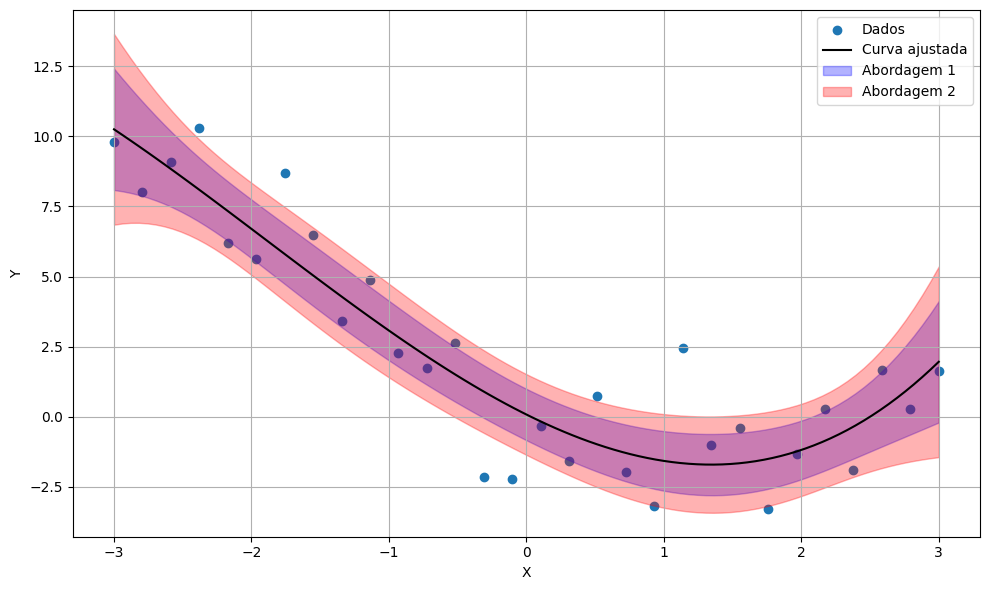

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Dados")
plt.plot(x0_vals, y_hat, color="black", label="Curva ajustada")
plt.fill_between(x0_vals, ci_1_lower, ci_1_upper, color="blue", alpha=0.3, label="Abordagem 1")
plt.fill_between(x0_vals, ci_2_lower, ci_2_upper, color="red", alpha=0.3, label="Abordagem 2")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.tight_layout()
plt.show()